  ## Task 6

## Step-1 Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, roc_curve, auc, precision_recall_curve
)

## Step-2 Import the dataset

In [3]:
df = pd.read_csv("Bank_train1.csv")

In [4]:
df

,Unnamed: 0,age,marital,education,default,balance,housing,loan,contact,day,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,duration_std
0,0,30,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,0,0,1,0,-0.711861
1,1,33,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,0,1,0,0,0,0,-0.169194
2,2,35,single,tertiary,no,1350,yes,no,cellular,16,...,0,1,0,0,0,0,0,0,0,-0.303898
3,3,30,married,tertiary,no,1476,yes,yes,unknown,3,...,0,1,0,0,0,0,0,0,0,-0.250017
4,4,59,married,secondary,no,0,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,-0.146102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,married,secondary,no,-333,yes,no,cellular,30,...,0,0,0,0,1,0,0,0,0,0.250315
4517,4517,57,married,tertiary,yes,-3313,yes,yes,unknown,9,...,0,0,0,1,0,0,0,0,0,-0.427057
4518,4518,57,married,secondary,no,295,no,no,cellular,19,...,0,0,0,0,0,0,1,0,0,-0.434754
4519,4519,28,married,secondary,no,1137,no,no,cellular,6,...,0,0,0,0,0,0,0,0,0,-0.519426


## Step-3 Separate features and target

In [5]:
X = df.drop(columns=['y'])
y = df['y']

## Step-4 Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

## Step-5 Train the model (Logistic Regression – Model-1)

In [19]:
# model = LogisticRegression(max_iter=1000, solver="liblinear")
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:, 1]

target_column = "y"  
X = df.drop(columns=[target_column])
y = df[target_column]
y = y.astype(str).str.strip().str.lower()
y = y.map({'no': 0, 'yes': 1})

#Convert categorical features into numeric
X = pd.get_dummies(X, drop_first=True)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver="liblinear")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# # 8️⃣ Evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n")
# print(classification_report(y_test, y_pred))


## Step-6 Calculate performance metrics

In [20]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 0.8928176795580111
Precision: 0.5636363636363636
Recall   : 0.2980769230769231
F1 Score : 0.38993710691823896


## Step-7 Bar Graph of Performance Metrics

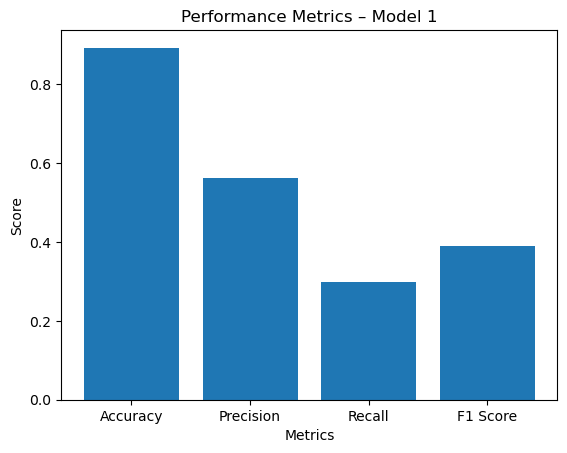

In [21]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure()
plt.bar(metrics, values)
plt.title("Performance Metrics – Model 1")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.show()

## Step-8 Confusion Matrix Visualization

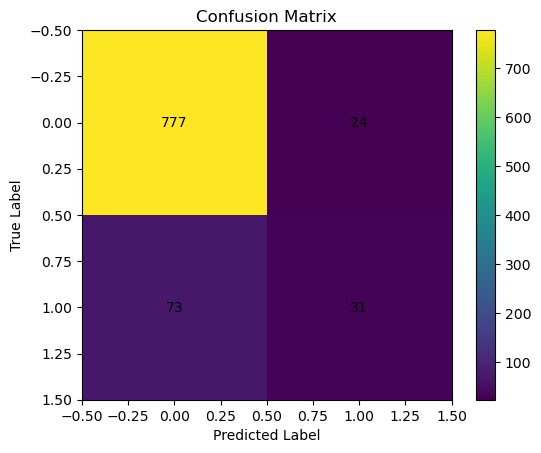

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

## Step-9 ROC Curve (Receiver Operating Characteristic)

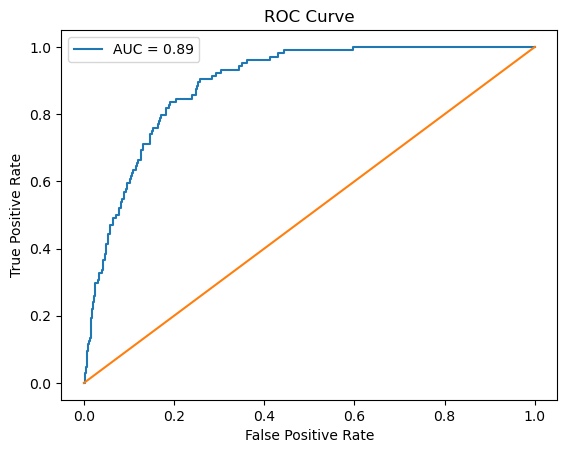

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc, 2)))
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Step-10 Precision–Recall Curve

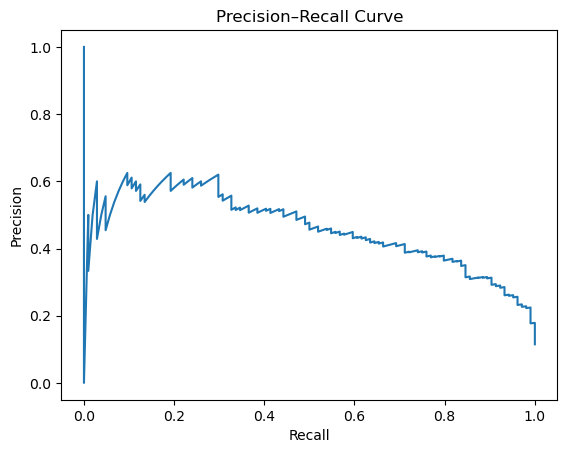

In [24]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

## Step-11 Accuracy Comparison (Train vs Test)

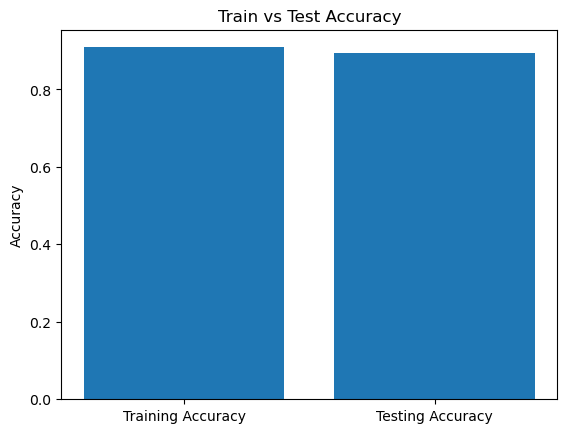

In [25]:
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc  = accuracy_score(y_test, y_pred)

plt.figure()
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_acc, test_acc])
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()